# Zauner

## Initialization

In [1]:
] activate "/Users/sflammia/Dropbox/Github/Zaunerdev"

  Activating project at `~/Dropbox/Github/Zaunerdev`


In [2]:
using Revise

In [3]:
using Zauner

In [4]:
using Serialization, ProfileSVG, BenchmarkTools

In [6]:
AdmissibleTuple(4)
Q = map(x->QuadBin(x...), deserialize("../data/Q") )
dims = deserialize("../data/d")
# L = deserialize("../data/L")
# A = deserialize("../data/A")
# G = deserialize("../data/ghosts")
println("Import complete.")

LoadError: ArgumentError: array must be non-empty

In [8]:
using Pkg
Pkg.status()
deps = Pkg.dependencies()
for (pkg, info) in deps
    println("Package: ", info.name, " Version: ", info.version)
end

Status `~/Library/CloudStorage/Dropbox/Github/Zaunerdev/Project.toml`
  [295af30f] Revise v3.5.14
  [ce1149fb] Zauner v0.1.0 `~/Dropbox/Github/Zauner`
  [44cfe95a] Pkg v1.10.0
Package: RandomExtensions Version: 0.4.4
Package: PCRE2_jll Version: 10.42.0+1
Package: MutableArithmetics Version: 1.4.4
Package: IrrationalConstants Version: 0.2.2
Package: Mmap Version: nothing
Package: Documenter Version: 1.4.1
Package: DiffRules Version: 1.15.1
Package: LibGit2 Version: nothing
Package: Base64 Version: nothing
Package: oneTBB_jll Version: 2021.12.0+0
Package: RegistryInstances Version: 0.1.0
Package: OpenLibm_jll Version: 0.8.1+2
Package: Revise Version: 3.5.14
Package: Artifacts Version: nothing
Package: SCS Version: 2.0.0
Package: JSON Version: 0.21.4
Package: InteractiveUtils Version: nothing
Package: MarkdownAST Version: 0.1.2
Package: Preferences Version: 1.4.3
Package: FFTW Version: 1.8.0
Package: FLINT_jll Version: 300.100.300+0
Package: LibGit2_jll Version: 1.6.4+0
Package: FileWatch

In [10]:
include("../test/runtests.jl")

Test Summary:          | Pass  Total  Time
Zauner algebraic tests |   39     39  0.4s
Test Summary:         | Pass  Total  Time
Zauner analytic tests |   13     13  0.1s
Test Summary:         | Pass  Total  Time
Zauner quadform tests |   16     16  0.1s
Test Summary:        | Pass  Total  Time
Zauner SL(2,ℤ) tests |   45     45  0.7s
Test Summary:            | Pass  Total  Time
Zauner double sine tests |   34     34  1.4s
Test Summary:      | Pass  Total  Time
Zauner utils tests |   35     35  0.2s
Test Summary:      | Pass  Total   Time
Zauner ghost tests |   75     75  25.0s
Test Summary:               | Pass  Total  Time
Zauner precision_bump tests |    5      5  2.5s
Test Summary:       | Pass  Total  Time
Zauner galois tests |   14     14  1.2s


Test.DefaultTestSet("Zauner galois tests", Any[], 14, false, false, true, 1.716144850917581e9, 1.716144852134038e9, false, "/Users/sflammia/Library/CloudStorage/Dropbox/Github/Zauner/test/runtests.jl")

## Temp

In [183]:
k=12
dd, QQ = dims[k], Q[k]
t = AdmissibleTuple(dd,QQ)

AdmissibleTuple( d = 11, K = ℚ(√24), q = 2, Q = ⟨1,-10,1⟩, h = 1 )

In [185]:
ψ = necromancy(t; overlap_target_prec=100, base=10)
Zauner.sic_overlap_test(ψ)

2.52071222528482522618675180001840683816198526671192350774762965437307402661736686468074183516659528595326978e-106

In [188]:
Zauner.ghostbasis(51)

Dict{ZZRingElem, Tuple{Vector{ZZRingElem}, Vector{QuadBin}}} with 3 entries:
  4 => ([2, 4], [-4*x^2 + 44*x*y + 35*y^2, -7*x^2 + 44*x*y + 20*y^2])
  2 => ([4], [7*x^2 + 22*x*y - 5*y^2])
  1 => ([2], [2*x^2 + 10*x*y - 7*y^2])

LoadError: UndefVarError: `Hecke` not defined

## Dev

In [13]:
# select examples of odd-d and Fz.
t = Tuple{Int64, QuadBin{ZZRingElem}}[]
for k=1:100
    if isodd(dims[k])
        q = conductor(Q[k])
        _, f = Int.(coredisc((dims[k]+1)*(dims[k]-3)))
        if !(rem(dims[k],9) == 3 && rem(ZZ(f//q),3) == 0)
            push!( t, (dims[k],Q[k]) )
        end
    end
end
FF = [AdmissibleTuple(t[k]...) for k=1:length(t)];

In [63]:
olp( m::Integer, n::Integer, v::Vector) = 
    sum([ (-e( one(eltype(v))/(2*length(v))) )^((2k-m)*n) * conj(v[mod(k,length(v))+1]) * v[mod(k-m,length(v))+1] for k=0:length(v)-1])

olp( p::Vector{<:Integer}, v::Vector) = olp(p[1],p[2],v)



olp (generic function with 2 methods)

In [66]:
ϕ = rand(Complex{BigFloat},13) 

13-element Vector{Complex{BigFloat}}:
  0.4629240780141280912517356267096571680064068699920013445803039396275531276094140076767253704303440461783261482044790355557931095271844322419603638683586965385389604626470065333592164576749204693711361837510686741230746047057808192931682564386617097126315679442013329005845865071371949465955125968629009721890212481010847330187069742527762350583530784132107016217614713495954788325011865416120788934451207511513909450544525602502298243234355624881764904893881256044462252010716552420930418614453575039800903315476982345552659395364966853693560297249738657670673211505964277694607716974790897295853668902358624299474943765610300683096972524412220583492385920310235274485593613692611456476884895234698705479870446280706605614422014377499867306966878138739255032061552613260977023186538975246668736565612203430264203020723077808673043118199141336158277396965530249459345803869155541285147299237925370561004340961862990262602281748135992713006341338495586063405938

In [69]:
setprecision(BigFloat,10024)
@time sum([ abs(ϕ'WH(radix(p,[F.d;F.d]),ϕ)) for p in 1:F.d^2-1])
@time sum([ abs(olp(radix(p,[F.d;F.d]),ϕ)) for p in 1:F.d^2-1])
@time sum([ abs(olp(p,q,ϕ)) for p in 0:F.d-1, q in 0:F.d-1])
@time begin
    s = zero(Complex{BigFloat})
    @inbounds for p in [radix(n,[F.d;F.d]) for n in 1:F.d^2-1]
        s += abs(olp(p,ϕ))
    end
end

  1.846003 seconds (356.11 k allocations: 246.525 MiB, 1.04% gc time, 1.25% compilation time)
  1.825166 seconds (352.08 k allocations: 244.032 MiB, 0.54% gc time, 0.79% compilation time)
  1.854770 seconds (362.76 k allocations: 245.587 MiB, 1.04% gc time, 1.04% compilation time)
  1.818835 seconds (352.65 k allocations: 244.264 MiB, 0.50% gc time, 0.78% compilation time)


In [11]:
# convergence with LLL in bits
# F = FF[ 1] # ( 5, ⟨ 1, -4 , 1⟩ ) # (200,)
# F = FF[ 2] # ( 7, ⟨ 2, -4 , 1⟩ ) # (2838,)
# F = FF[ 3] # ( 7, ⟨ 1, -6 , 1⟩ ) # (420, )
# F = FF[ 4] # ( 9, ⟨ 1, -8 , 1⟩ ) # (6608, )
# F = FF[ 5] # ( 9, ⟨ 5, -10, 2⟩ ) # (6132, )
# F = FF[ 6] # (11, ⟨ 3, -6 , 1⟩ ) #  (356,)
# F = FF[ 7] # (11, ⟨ 1, -10, 1⟩ ) # (6564,3284)
# F = FF[ 8] # (11, ⟨ 3, -12, 4⟩ ) # 
# F = FF[ 9] # (13, ⟨ 1, -12, 1⟩ ) # 
F = FF[10] # (13, ⟨ 7, -14, 2⟩ ) # (5764,) 
# F = FF[11] # (15, ⟨ 1, -4 , 1⟩ ) # (10252,)
# F = FF[12] # (15, ⟨ 4, -8 , 1⟩ ) # (10054,)
# F = FF[13] # (15, ⟨ 1, -14, 1⟩ ) # 
# F = FF[14] # (15, ⟨11, -18, 3⟩ ) # 
# F = FF[15] # (17, ⟨ 2, -6 , 1⟩ ) # <---
# F = FF[16] # (17, ⟨ 1, -16, 1⟩ ) # 
# F = FF[17] # (17, ⟨ 9, -18, 2⟩ ) # 
# F = FF[18] # (19, ⟨ 1, -3 , 1⟩ ) # 
# F = FF[19] # (19, ⟨ 4, -6 , 1⟩ ) # 
# F = FF[20] # (19, ⟨ 5, -10, 1⟩ ) # 

AdmissibleTuple( d = 13, K = ℚ(√140), q = 1, Q = ⟨7,-14,2⟩, h = 2 )

In [74]:
testflag = true
k = 3
while testflag && k ≤ 16
    k = k+1
    F = FF[k]
    println("$F\n")
    nu = necromancy(F; max_prec = 2^14, verbose = false)
    # println("x = $x")
    test = 1.0
    j = 0
    while test >= 1e-10 && j ≤ (2^iseven(F.d)*F.d)^4 
        ψ, test = matrix_completion( nu, F; shift = j)
        j += 1
    end        
    println((test < 1e-10 ? "TRUE" : "    FALSE"),"\n----------")
    sleep(0.1)
end

AdmissibleTuple( d = 9, , K = ℚ(√60), q = 1, Q = ⟨1,-8,1⟩, h = 2 )

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 163, constraints m: 433
cones: 	  z: primal zero / dual free vars: 262
	  s: psd vars: 171, ssize: 1
settings: eps_abs: 1.0e-10, eps_rel: 1.0e-10, eps_infeas: 1.0e-10
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 2296, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.49e+01  1.00e+00  1.26e+02 -6.12e+01  1.00e-01  5.44e-04 
   250| 8.35e-10  5.74e-

┌ Warning: Problem status ITERATION_LIMIT; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/b2S4H/src/solution.jl:342
┌ Warning: Problem status ITERATION_LIMIT; solution may be inaccurate.
└ @ Convex ~/.julia/packages/Convex/b2S4H/src/solution.jl:342


LoadError: ReadOnlyMemoryError()

In [20]:
ψ = matrix_completion( nu, F; verbose = false, shift = 0)

13-element Vector{ComplexF64}:
    0.2621301111524907 + 1.1268687922634738e-16im
  -0.10290874267317278 + 0.019437749325875345im
  -0.03088272900706846 + 0.3065100402284744im
    0.2869128062696129 + 0.14374377010042258im
    0.3044048150561564 - 0.0990582788186976im
   0.20493476921592474 - 0.07015496951549915im
   -0.5255831472178902 - 0.11572457652389463im
 -0.007280655551498518 - 0.2560264439448156im
   0.06261282704437066 - 0.019441348163572028im
   0.08284304691352858 - 0.18242048970102617im
  0.026844696510972658 - 0.01193512287077365im
   0.12903482363723276 + 0.30329945578673034im
    0.2520609352036896 - 0.018229785943003694im

In [18]:
testflag = false
k = 10
F = FF[k] # FiducialDatum
println("$F\n")
nu = necromancy(F; max_prec = 2^14, verbose = false)
println(size(nu))
for j = 0:prod(size(nu))-1
    ψ = matrix_completion( nu, F; verbose = false, shift = j)
    test < 1e-7 && println(radix(j,size(nu)),", ",test)
    testflag |= test < 1e-7
    if testflag
        println("j = $j")
        break
    end
end
println((testflag ? "\nIt's a SIC!" : "    FALSE"),"\n----------")


AdmissibleTuple( d = 13, , K = ℚ(√140), q = 1, Q = ⟨7,-14,2⟩, h = 2 )

(4, 4, 3)


LoadError: UndefVarError: `test` not defined

In [242]:
z = re_im_proj(Complex{BigFloat}.(ψ))
precision_bump!(z, Zauner._olp_func, 256; base = 2)

Increase precision...
Current precision is 32 bits.
  0.018885 seconds (1.16 M allocations: 47.383 MiB, 36.32% gc time)
Current precision is 32 bits.
  0.018389 seconds (1.16 M allocations: 47.383 MiB, 35.02% gc time)
Current precision is 32 bits.
  0.016728 seconds (1.16 M allocations: 47.383 MiB, 38.19% gc time)
Current precision is 32 bits.
  0.013606 seconds (1.16 M allocations: 47.383 MiB, 24.84% gc time)
Current precision is 52 bits.
  0.015920 seconds (1.16 M allocations: 51.779 MiB, 17.18% gc time)
Current precision is 92 bits.
  0.013857 seconds (1.16 M allocations: 56.175 MiB, 19.79% gc time)
Current precision is 172 bits.
  0.019135 seconds (1.16 M allocations: 69.364 MiB, 23.68% gc time)
Precision of BigFloat is now 344 bits.
Final precision is 332 bits.


28-element Vector{BigFloat}:
  1.2229576464997355370317323896975970088188130571941408243062773900634801119818446316036550965247386927592
  0.91676010932295188464059206504415522289717372440965794168300823263255756464874880977971687236932404862813
 -3.26336438011762607556951988656167665672098293283264069445559350269260403289911423758657064117423843162131
 -1.15132591645421009791130061394839070060100532904326062039663512790494361199525585025760511566821718842892
  0.905501094796464960375162365230901428734222140235707567945354294785986204784850639189540846879891103098856
 -3.08791229791311478280086874609361891697178219551213476079739022037611978796381094220759282130301548626345
  1.30175254714743736156192095978608447015423430625064892165885944183543827759509359760568025728416594135377
 -4.44154869418439493204696481767300114310114796860897358390384458699088097193376493044835822144289166372431
  1.72465803900752073628608976137417645356732026845568615968835953900484715540118609424155965368038

In [256]:
ψ2 = re_im_proj(z)
ψ2 ./= norm(ψ2)
all([ abs(ψ2'WH(radix(p,[F.d;F.d]),ψ2)) for p=1:F.d^2-1 ] 
    .≈ 1/sqrt(BigInt(F.d)+1))

re_im_proj(ψ2)

28-element Vector{BigFloat}:
  1.2229576464997355370317323896975970088188130571941408243062773900634801119818446316036550965247386927592
  0.916760109322951884640592065044155222897173724409657941683008232632557564648748809779716872369324048628158
 -3.26336438011762607556951988656167665672098293283264069445559350269260403289911423758657064117423843162131
 -1.15132591645421009791130061394839070060100532904326062039663512790494361199525585025760511566821718842892
  0.905501094796464960375162365230901428734222140235707567945354294785986204784850639189540846879891103098856
 -3.08791229791311478280086874609361891697178219551213476079739022037611978796381094220759282130301548626345
  1.30175254714743736156192095978608447015423430625064892165885944183543827759509359760568025728416594135382
 -4.44154869418439493204696481767300114310114796860897358390384458699088097193376493044835822144289166372431
  1.7246580390075207362860897613741764535673202684556861596883595390048471554011860942415596536803

In [62]:
# convergence with LLL in bits
# F = FF[ 1] # ( 5, ⟨ 1, -4 , 1⟩ ) # (200,)

# F = FF[ 2] # ( 7, ⟨ 2, -4 , 1⟩ ) # (2838,)
F = FF[ 3] # ( 7, ⟨ 1, -6 , 1⟩ ) # (420, )
# F = FF[ 4] # ( 9, ⟨ 1, -8 , 1⟩ ) # (6608, )
# F = FF[ 5] # ( 9, ⟨ 5, -10, 2⟩ ) # (6132, )
# F = FF[ 6] # (11, ⟨ 3, -6 , 1⟩ ) #  (356,)
# F = FF[ 7] # (11, ⟨ 1, -10, 1⟩ ) # (6564,3284)
# F = FF[ 8] # (11, ⟨ 3, -12, 4⟩ ) # 
# F = FF[ 9] # (13, ⟨ 1, -12, 1⟩ ) # 
# F = FF[10] # (13, ⟨ 7, -14, 2⟩ ) # (5764,) 
# F = FF[11] # (15, ⟨ 1, -4 , 1⟩ ) # (10252,)
# F = FF[12] # (15, ⟨ 4, -8 , 1⟩ ) # (10054,)
# F = FF[13] # (15, ⟨ 1, -14, 1⟩ ) # yes
# F = FF[14] # (15, ⟨11, -18, 3⟩ ) # no
# F = FF[15] # (17, ⟨ 2, -6 , 1⟩ ) # 
# F = FF[16] # (17, ⟨ 1, -16, 1⟩ ) # 
# F = FF[17] # (17, ⟨ 9, -18, 2⟩ ) # 
# F = FF[18] # (19, ⟨ 1, -3 , 1⟩ ) # 
# F = FF[19] # (19, ⟨ 4, -6 , 1⟩ ) # 
# F = FF[20] # (19, ⟨ 5, -10, 1⟩ ) # 

AdmissibleTuple( d = 7, K = ℚ(√8), q = 2, Q = ⟨1,-6,1⟩, h = 1 )

In [63]:
# a,b,s = ghost_invariants(F);
x = necromancy(F; verbose = false)
# map( x -> abs.(x), x)
# display(x)
all(abs.(x[:]) .≈ 1.0)

true

In [65]:
matrix_completion(x,F)

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 99, constraints m: 269
cones: 	  z: primal zero / dual free vars: 164
	  s: psd vars: 105, ssize: 1
settings: eps_abs: 1.0e-10, eps_rel: 1.0e-10, eps_infeas: 1.0e-10
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1200, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.44e+01  1.00e+00  9.74e+01 -4.72e+01  1.00e-01  3.60e-04 
   125| 6.09e-11  7.59e-13  6.14e-11  2.83e+00  3.94e-01  3.18e-03 
-------------------------

(ComplexF64[0.19600171277916809 - 7.861726000601788e-17im, 0.23088404836766355 + 0.40530437805379727im, 0.12696687443029187 + 0.6055399023113359im, -0.1520673442636422 - 0.13736890827618825im, -0.08024909053535699 - 0.2906071838210618im, 0.12118210358184002 + 0.056074038580332754im, -0.4427183043595165 - 0.12037043829301439im], 2.6645352591003757e-15)

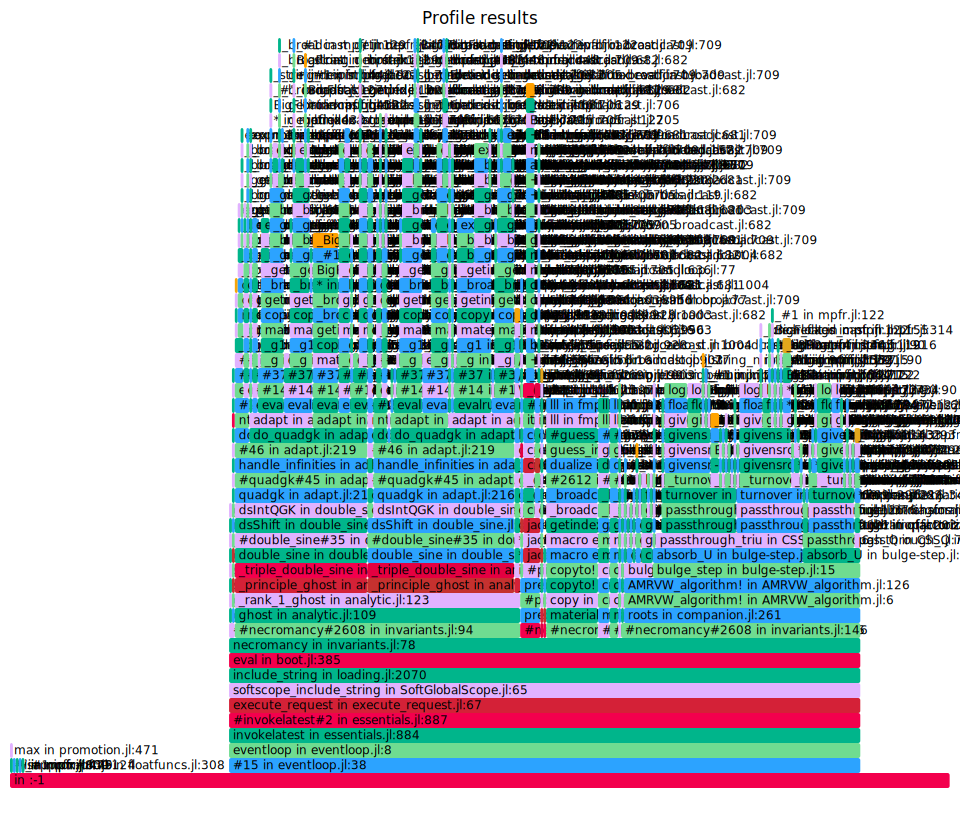

┌ Warning: The depth of this graph is 54, exceeding the `maxdepth` (=50).
│ The deeper frames will be truncated.
└ @ ProfileSVG ~/.julia/packages/ProfileSVG/mZ6ea/src/ProfileSVG.jl:294
┌ Warning: The depth of this graph is 54, exceeding the `maxdepth` (=50).
│ The deeper frames will be truncated.
└ @ ProfileSVG ~/.julia/packages/ProfileSVG/mZ6ea/src/ProfileSVG.jl:294


In [438]:
@profview necromancy(F; verbose = false)

In [288]:
orbs = galois_orbit(F)
gens, ords = galois_normal_form(F)
dd = 2^iseven(F.d)*F.d
T = Matrix{ZZRingElem}[]
r = length(ords)
for m in [ radix(k,ords) for k=0:prod(ords)-1 ]
    push!( T, mod.( prod(gens.^m), dd) )
end
# these are then the p-vectors that we'll use
p0 = orbs[1]
allp = map( X -> Integer.(mod.(X*p0, dd)), T)
# gnu = [ real(ϕ'WH(p,ψ)) for p in allp]

test, L = is_antiunitary_with_generator(F)
# if F is unitary, then F.L is the stabilizer generator.
if !test
    # L = Matrix{Integer}(F.L)
    L = F.L
end
stab = [ mod.(L,dd) ]
k=1
while stab[k] != [1 0; 0 1]
    push!(stab, mod.(L*stab[k], dd))
    k += 1
end
stab = circshift(stab,1) # put the identity first.

3-element Vector{Matrix{ZZRingElem}}:
 [1 0; 0 1]
 [12 12; 1 0]
 [0 1; 12 12]

In [59]:
stabilizer_elements(F)

6-element Vector{Matrix{ZZRingElem}}:
 [1 0; 0 1]
 [3 6; 2 6]
 [0 5; 4 6]
 [3 2; 3 4]
 [6 2; 3 0]
 [1 6; 2 4]

In [315]:
k = 44
F = AdmissibleTuple(dims[k],Q[k])
display(F)
galois_normal_form(F)

AdmissibleTuple( d = 23, K = ℚ(√120), q = 1, Q = ⟨6,-12,1⟩, h = 2 )

(Matrix{ZZRingElem}[[13 2; 11 14], [12 0; 0 12]], [16, 11])

In [231]:
display( abs.( c[1][:,2:end]/sqrt(BigInt(F.d)+1) ) )
display( abs.( c[2][:,2:end]/sqrt(BigInt(F.d)+1) ) )
display( abs.( c[3][:,2:end]/sqrt(BigInt(F.d)+1) ) )

2×6 Matrix{BigFloat}:
 2.25291  89.0736  364.393  10193.0  62373.6  688865.0
 2.25291  89.0736  364.393  10193.0  62373.6  688865.0

2×6 Matrix{BigFloat}:
 1.06395    259.654  1336.89  1028.64   17269.9    1648.4
 0.0847359  236.936  1089.82    38.889  41746.3  366920.0

3×4 Matrix{BigFloat}:
    5.80582      323.254        6993.06         635130.0
 1935.75           2.86876e+07     3.13367e+07       7.49263e+10
    2.14763e+08    3.54101e+17     3.64017e+17       9.22589e+20

## Testing

In [28]:
setprecision(BigFloat,128)
kk = [2; 4; 5; 11; 20; 21; 26; 31; 32; 33; 76]
# 4, 31, 32 are anti-unitary
k = 9
d = dims[kk[k]]
q = Q[kk[k]]
F = AdmissibleTuple( d, q)

d = 15
# F15d = AdmissibleTuple(dims[20],Q[20]) # a singlet with fj/fQ = 1
# F15b = AdmissibleTuple(dims[21],Q[21]) # a singlet with fj/fQ = 2
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4
F = F15c

display(F)
@time ψ = ghost(F);


AdmissibleTuple( d = 25, r = 1, K = ℚ(√572), q = 1, Q = ⟨1,-24,1⟩, h = 2 )

  0.537248 seconds (5.91 M allocations: 217.294 MiB, 2.67% gc time)


In [143]:
k = 0
F = AdmissibleTuple(4);

This is the new way of doing it where I round into the class field $H$.

In [352]:
testbadness = true
while testbadness
    k += 1
    F = AdmissibleTuple(dims[k],Q[k])
    testbadness = 
        (rem(F.d,9) == 3 && rem(ZZ(F.f//F.q),3) == 0) || iseven(F.d)
end
display(F)

F = AdmissibleTuple(5)
Zauner.ghostclassfield(F)
Zauner.signswitch(F)
    
println("Computing ghost fiducial.")
sleep(.1)
@time ψ = ghost(F);


galorb = galois_orbit(F)

prec = 8F.h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        " and class number is $(F.h).")
println("Choosing $prec digits of precision.")
sleep(.1)

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))
sleep(.1)

println("Computing relevant overlaps")
sleep(.1)
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]

psums = [sum(gnu.^k) for k=1:length(gnu)÷2]

println("Round into H and Galois conjugate")
sleep(.1)
@time t = Zauner.round_conj( F, psums)

c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
sleep(.1)
@time θ = Zauner.roots(c)

println("All roots are phases?\n\n  ",all(abs2.(θ) .≈ 1.0),"\n\n",F)

setprecision( BigFloat, 256; base=2)
Complex{BigFloat}.(θ)


AdmissibleTuple( d = 25, K = ℚ(√572), q = 1, Q = ⟨1,-24,1⟩, h = 2 )

Computing ghost fiducial.
  0.261564 seconds (1.93 M allocations: 83.967 MiB, 4.51% gc time)
Galois orbit has length 8 and class number is 1.
Choosing 192 digits of precision.
Increase ghost precision...
Current ghost precision is 56 digits.
  0.001082 seconds (31.39 k allocations: 1.899 MiB)
Current ghost precision is 111 digits.
  0.000885 seconds (31.39 k allocations: 2.603 MiB)
Precision of BigFloat is now 222 digits.
Final ghost precision is 221 digits.
Is anti-unitary? false
Computing relevant overlaps
  0.031888 seconds (25.90 k allocations: 1.748 MiB, 96.68% compilation time)
Round into H and Galois conjugate
  0.003775 seconds (22.86 k allocations: 1.143 MiB)
Finding numerical roots for SIC phases
  0.020837 seconds (165.78 k allocations: 7.877 MiB)
All roots are phases?

  true

AdmissibleTuple( d = 5, , K = ℚ(√12), q = 1, Q = ⟨1,-4,1⟩, h = 1 )


8-element Vector{Complex{BigFloat}}:
 -0.9687929143250779340546514752385049254884920445946961425335341277371055034199726 - 0.2478715174309509202075734366477961970035441203182859829578983209980803523731683im
 -0.9687929143250779340546514752385049254884920445946961425335341277371055034199726 + 0.2478715174309509202075734366477961970035441203182859829578983209980803523731683im
 -0.6030082723892604881128576722467605657019542995429781669872079045374645505671939 - 0.7977349330636833953558349473102297489972960303884025719417673182549940041682843im
 -0.6030082723892604881128576722467605657019542995429781669872079045374645505671939 + 0.7977349330636833953558349473102297489972960303884025719417673182549940041682843im
  -0.264057475606436880434887806492977160134333663817357577120560316366915492862826 - 0.9645069463598258564089868726182778798067657965516124854665534924663708711482946im
  -0.264057475606436880434887806492977160134333663817357577120560316366915492862826 + 0.9645069463598258564089868

In [156]:
real.(-im*log.(θ)/(2pi))

40-element Vector{BigFloat}:
 -0.4729344662043795936325919670704830450560865879205279596998115344911970745893781
  0.4729344662043795936325919670704830450560865879205279596998115344911970745893781
 -0.4655187035509468423520918160773106148634573878693968669010407636757481145499587
  0.4655187035509468423520918160773106148634573878693968669010407636757481145499587
 -0.4467666212195651053232966018662266238517903790449752883307415046492362179685618
  0.4467666212195651053232966018662266238517903790449752883307415046492362179685618
 -0.4297506315226102132911269620777988776906175677719450225208641390246108965833509
  0.4297506315226102132911269620777988776906175677719450225208641390246108965833509
 -0.3942061930091178985163782644244441789280882754158804160488895309887957638032117
  0.3942061930091178985163782644244441789280882754158804160488895309887957638032117
 -0.3911230213682981048252598151509757441752390528714770560861496059629783480874432
  0.3911230213682981048252598151509757441752390

This is the old way of doing it when I try to round into a quadratic field, but I power sum over the whole multiplet.

In [57]:
galorb = galois_orbit(F)

prec = F.h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        ", choosing $prec digits of precision.")

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))

println("Computing relevant overlaps")
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]

s = Zauner.to_quadratic.([sum(gnu.^k) for k=1:length(gnu)÷2],F.D)
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))


Galois orbit has length 48, choosing 384 digits of precision.
Increase ghost precision...
Current ghost precision is 31 digits.
  2.255390 seconds (6.76 M allocations: 426.845 MiB, 18.55% gc time, 99.00% compilation time)
Current ghost precision is 61 digits.
  0.032962 seconds (1.16 M allocations: 74.256 MiB, 52.05% gc time)
Current ghost precision is 121 digits.
  0.033069 seconds (1.16 M allocations: 100.632 MiB, 48.54% gc time)
Current ghost precision is 241 digits.
  0.032223 seconds (1.16 M allocations: 162.178 MiB, 22.46% gc time)
Precision of BigFloat is now 482 digits.
Final ghost precision is 481 digits.
Is anti-unitary? false
Computing relevant overlaps
  0.072306 seconds (264.25 k allocations: 24.437 MiB, 70.11% compilation time)
LLL log norm = 671.2436219436279
Evaluating the conjugate
Finding numerical roots for SIC phases
  0.883908 seconds (6.23 M allocations: 308.812 MiB, 5.94% gc time, 50.57% compilation time)
All roots are phases?
false


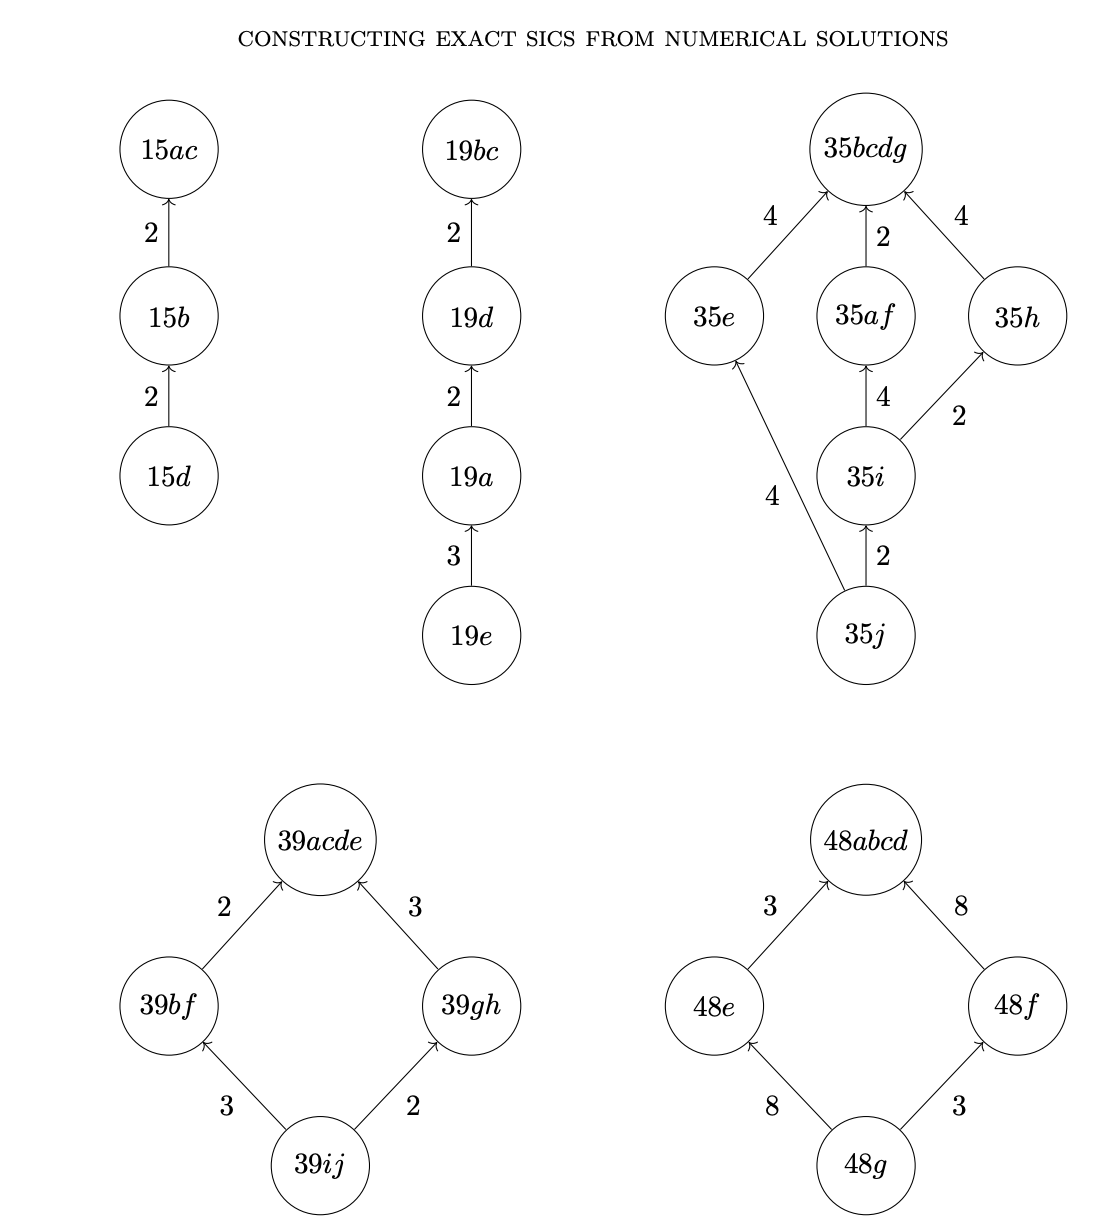

### Trying a multiplet "by hand"

In [20]:
d, q = map( n -> (dims[n], Q[n]), 8)
F = AdmissibleTuple(d,q) # half of a doublet for d = 9
display(F)
@time ψ = ghost(F);

AdmissibleTuple( d = 9, r = 1, K = ℚ(√60), 1, Q = ⟨1,-8,1⟩ )

  7.950879 seconds (65.33 M allocations: 4.055 GiB, 2.38% gc time)


In [22]:
galorb = galois_orbit(F)

h = Int(quadclassunit(Int(F.D//F.f^2))[1]) # class number

2

In [23]:
prec = 4h*ceil(Int,log(2,1+F.d))*length(galorb)

println("Galois orbit has length ",length(galorb),
        ", choosing $prec digits of precision.")

# z = re_im_proj(ψ) # represent as 2d-2 real coordinates
# precision_bump!( z, prec; base = 10, verbose = true);
# ψ = re_im_proj(z)
ψ = precision_bump( ψ, prec; base = 10, verbose = true);
ϕ = circshift(reverse(ψ),1)
ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

println("Is anti-unitary? ", is_antiunitary(F))

Galois orbit has length 18, choosing 576 digits of precision.
Increase ghost precision...
Current ghost precision is 111 digits.
  0.801907 seconds (2.33 M allocations: 157.274 MiB, 2.39% gc time, 99.59% compilation time)
Current ghost precision is 221 digits.
  0.004291 seconds (217.70 k allocations: 27.134 MiB)
Current ghost precision is 442 digits.
  0.023927 seconds (217.70 k allocations: 46.894 MiB, 64.13% gc time)
Precision of BigFloat is now 884 digits.
Final ghost precision is 883 digits.
Is anti-unitary? false


In [98]:
println("Computing relevant overlaps")
@time gnu = [ real(ϕ'WH(p,ψ)) for p in galorb]
psums = [sum(gnu.^k) for k=1:length(gnu)÷2];

Computing relevant overlaps
  0.031295 seconds (42.99 k allocations: 5.865 MiB, 57.15% compilation time)


In [111]:
Kx, x = K["x"]

(Univariate Polynomial Ring in x over K, x)

In [105]:
s = psums[4];

# build some field towers.
Qx, x = QQ["x"];
K, a = NumberField(x^2 - ZZ(F.D),"a")

Ky, y = K["y"]
# H, b = NumberField(pol, "b")

(Univariate Polynomial Ring in y over K, y)

In [106]:
# guess the factored part directly.
# that is, guess a polynomial of degree h with coefficents in K
c = Zauner.guess_algebraic_over_quadratic(s,h,F.D)
push!(c,0)
pol = sum((reshape(c,(h+1,2))*[one(a); a]) .* [ y^k for k=0:h])
factor(pol)

-1 * (y^2 + (-73800*a - 571500)*y + 4082400000*a + 31622130000)

In [107]:
# guess the abs. min. poly. and then factor it
c2 = Zauner.guess_algebraic(s,2h) 
pol2 = c2'*[x^k for k=0:2h]
display(pol2)
fac2 = factor(pol2,K)

x^4 - 1143000*x^3 + 63070110000*x^2 + 9639810000000*x - 279863100000000

1 * (x^2 + (-73800*a - 571500)*x + 4082400000*a + 31622130000) * (x^2 + (73800*a - 571500)*x - 4082400000*a + 31622130000)

In [91]:
fac2.fac

Dict{AbstractAlgebra.Generic.Poly{nf_elem}, Int64} with 2 entries:
  x^2 + (15//2*a - 45)*x - 135*a + 1080  => 1
  x^2 + (-15//2*a - 45)*x + 135*a + 1080 => 1

In [278]:
s = Zauner.guess_algebraic.(sqrt(BigFloat(F.D)),2h)

5-element Vector{BigInt}:
 -60
   0
   1
   0
   0

In [290]:
Zauner.guess_int_null_vec( 
    [one(BigFloat); sqrt(BigFloat(F.D)); 7+4*sqrt(BigFloat(F.D))]
)

3-element Vector{BigInt}:
 -7
 -4
  1

In [ ]:
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))

In [221]:
dims[46], Q[46:49]
dims[8:9], Q[8:9]


([9, 9], QuadBin{ZZRingElem}[x^2 - 8*x*y + y^2, 5*x^2 - 10*x*y + 2*y^2])

In [46]:
F = AdmissibleTuple(dims[46], Q[46])

AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 1, Q = ⟨1,-22,1⟩ )

In [54]:
D = (F.d+1)*(F.d-3)
Δ,f = coredisc(D)
display((Δ,f))
_, a = quadratic_field(Δ)
ω = (D%4 + f*a)//2
# generate the quadratic order from the standard basis
Zω = Order([one(ω), ω])

println("Order is given by:\n  ",Zω,"\n")
cg, cm = class_group(Zω)
println("Class group of the order is:\n  ",(cg,cm),"\n")
# compute the class group and generator map
# cg, cm = picard_group(Zω)
pg, pm = picard_group(Zω)
println("Picard group of the order is:\n  ",(pg,pm),"\n")
# reduction(QuadBin(cm(gens(cg)[1])))

(120, 2)

Order is given by:
  Order of Real quadratic field defined by x^2 - 120
with Z-basis NfOrdElem[1, sqrt(120)]

Class group of the order is:
  (GrpAb: Z/2, ClassGroup map of 
Set of ideals of Zω
)

Picard group of the order is:
  (GrpAb: (Z/2)^2, Picard Group map of 
Set of ideals of Zω
)



In [154]:
F = AdmissibleTuple(9)
println(F)

D = (F.d+1)*(F.d-3)÷1
Δ,f = coredisc(D)
display((Δ,f))
_, a = quadratic_field(Δ)
ω = (D%4 + f*a)//2
# generate the quadratic order from the standard basis
Zω = Order([one(ω), ω])
println("Order is given by:\n  ",Zω,"\n\n--------\n")


pg, pm = picard_group(Zω)
println("Picard group is:\n  ",pg,"\n")
println("Elements are:\n", pm.(pg) )
println("As forms:")
display(reduction.(QuadBin.(pm.(pg))))

# println("\n--------\n")
# cg, cm = class_group(Zω)
# println("Class group is:\n  ",cg,"\n")
# println("Generators are:\n",gens(cg))
# println("Generators are:\n",[ cm(g) for g in gens(cg) ])
# reduction(QuadBin(cm(gens(cg)[1])))


AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), f = 1, Q = ⟨1,-22,1⟩ )


(120, 2)

Order is given by:
  Order of Real quadratic field defined by x^2 - 120
with Z-basis NfOrdElem[1, sqrt(120)]

--------

Picard group is:
  GrpAb: (Z/2)^2

Elements are:
NfOrdIdl[Ideal of (Zω)
with basis matrix
[1 0; 0 1], Ideal of (Zω)
with basis matrix
[57 0; 33 1], Ideal of (Zω)
with basis matrix
[29 0; 2 1], Ideal of (Zω)
with basis matrix
[1653 0; 147 1]]
As forms:


4-element Vector{QuadBin{ZZRingElem}}:
 x^2 + 20*x*y - 20*y^2
 -7*x^2 + 12*x*y + 12*y^2
 -4*x^2 + 20*x*y + 5*y^2
 13*x^2 + 18*x*y - 3*y^2

In [218]:
Zauner.guess_algebraic(BigFloat(3)^(1/BigFloat(3))+BigFloat(3)^(2/BigFloat(3)),2)

3-element Vector{BigInt}:
 -589849553474396944841650177372651089432036255660583
  174719368381549603416539665878016040927750384288501
   -2060986329311871092129641387934536051174286616312

In [366]:
setprecision(BigFloat,128)
k = 8:9 # for d = 9
k = 12:13 # for d = 11
k = 16:17 # for d = 13
k = 22:23 # for d = 15
k = 27:28 # for d = 17
k = 34:35 # for d = 19
k = 44:45 # for d = 23 with class number 2
# the next example has some anomalies.
# k = 46:49 # for d = 23 with class number 4
# q = map( x-> QuadBin(x...),[ (1, -22, 1); (4, -28, 19); (3, -24, 8); (7, -30, 15) ])
q = Q[k]
d = dims[k[1]]
M = AdmissibleTuple.([])
V = Complex{BigFloat}.([])
for qq in q
    println("Computing ",qq)
    push!( M, AdmissibleTuple( d, qq) )
    @time push!( V, ghost(M[end]))
end
M
# d = 15
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
# F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4

# d = 23
# Q = [ [1,-22,1], [19,-10,-5], [8,-24,3], [15,0,-8] ]
# F15a = AdmissibleTuple(dims[22],Q[22]) # principal of the doublet with fj/fQ = 4
# F15c = AdmissibleTuple(dims[23],Q[23]) # other part of a doublet with fj/fQ = 4


Computing 6*x^2 - 12*x*y + y^2
  6.098325 seconds (226.49 M allocations: 9.220 GiB, 24.84% gc time)
Computing 3*x^2 - 12*x*y + 2*y^2
  8.913388 seconds (353.33 M allocations: 14.428 GiB, 26.40% gc time)


2-element Vector{AdmissibleTuple}:
 AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 2, Q = ⟨6,-12,1⟩ )
 AdmissibleTuple( d = 23, r = 1, K = ℚ(√120), 2, Q = ⟨3,-12,2⟩ )

In [367]:
gnu = BigFloat[]
for k in 1:length(M)
    F = M[k]
    ψ = V[k]
    galorb = galois_orbit(F)
    prec = 1*length(M)*ceil(Int,log(2,1+F.d))*length(galorb)
    println("Galois orbit has length ",length(galorb),
        " in a multiplet with ",length(M)," elements; ",
        "choosing $prec digits of precision.")
    ψ = precision_bump( ψ, prec; base = 10, verbose = true);
    ϕ = circshift(reverse(ψ),1)
    ϕ .*= (F.d+1)/ϕ'ψ # include normalization factors

    println("Computing relevant overlaps")
    @time gnu = vcat(gnu , [ real(ϕ'WH(p,ψ)) for p in galorb] )
end

Galois orbit has length 176 in a multiplet with 2 elements; choosing 1760 digits of precision.
Increase ghost precision...
Current ghost precision is 24 digits.
  0.055885 seconds (4.06 M allocations: 198.151 MiB, 27.58% gc time)
Current ghost precision is 44 digits.
  0.061348 seconds (4.06 M allocations: 229.038 MiB, 34.76% gc time)
Current ghost precision is 84 digits.
  0.064380 seconds (4.06 M allocations: 290.813 MiB, 31.23% gc time)
Current ghost precision is 164 digits.
  0.080390 seconds (4.06 M allocations: 445.249 MiB, 25.43% gc time)
Current ghost precision is 324 digits.
  0.121463 seconds (4.06 M allocations: 692.347 MiB, 19.08% gc time)
Current ghost precision is 644 digits.
  0.212228 seconds (4.06 M allocations: 1.189 GiB, 12.66% gc time)
Current ghost precision is 1284 digits.
  0.395293 seconds (4.06 M allocations: 2.305 GiB, 10.35% gc time)
Precision of BigFloat is now 2568 digits.
Final ghost precision is 2564 digits.
Computing relevant overlaps
  2.526407 seconds 

In [368]:
s = Zauner.to_quadratic.([sum(gnu.^k) for k=1:length(gnu)÷2],F.D)
# small if a true integer relation was found
println("LLL log norm = ", norm(map(x -> floor(Int,log10(abs(x[1]))) , s)))

println("Evaluating the conjugate")
t = map( x -> (-x[2]+x[3]*sqrt(BigInt(F.D)))/x[1], s);
c = Zauner.pow_to_elem_sym_poly(t .* [(-sqrt(BigInt(F.d+1)))^(-k) for k=1:length(t)])
c = [c; reverse(c)[2:end]];
setprecision(BigFloat,256)
println("Finding numerical roots for SIC phases")
@time θ = Zauner.AMRVW.roots(c)

println("All roots are phases?\n",all(abs2.(θ) .≈ 1.0))

LLL log norm = 0.0
Evaluating the conjugate
Finding numerical roots for SIC phases
 16.550252 seconds (217.75 M allocations: 10.076 GiB, 4.86% gc time)
All roots are phases?
true


## Scratch

# Data Table from appendix E

The following code generates the data table in Appendix E. This prints directly to my copy of "data.tex" in the Overleaf repo using my copy of (the dev version of) Zauner.jl.

In [ ]:
] activate "/Users/sflammia/Dropbox/Github/Zaunerdev"

In [ ]:
using Zauner
using Serialization

In [ ]:
Q = map(x->QuadBin(x...), deserialize("../data/Q") )
dims = deserialize("../data/d")
println("Import complete.")

In [34]:
FF = AdmissibleTuple[]
for j = 1:614
    push!(FF, AdmissibleTuple(dims[j],Q[j]) )
end

In [417]:
open("/Users/sflammia/Dropbox/Apps/Overleaf/Construction of SIC-POVMs/figures/data.tex", "w") do io
    println(io, "\\begin{center}")
    println(io, "\\begin{longtable}{ttttttttt}")
    println(io, "\\toprule")
    println(io, "d & \\Delta_0 & f & h & \\Cl(\\mathcal{O}_f) & Q & A & \\text{a.u.} & \\ell(A) \\\\")

    d = 1
    qval = 0
    for j=1:614
        F = FF[j]
        au, L = is_antiunitary_with_generator(F)
        if !(au)
            L = F.L
        end
        print(io, ( F.d==d ? "" : "\\midrule\n"))
        print(io, ( F.d==d ? "" : F.d),"&") # dimension d
        print(io, ( F.d==d ? "" : F.D),"&") # fundamental discriminant Δ
        print(io, ( F.d==d && F.q == qval ? "" : F.q),"&") # conductor f
        cgp = sort(Int.(Zauner.ghostbasis(F.d)[F.q][1])) # sorted class group structure
        print(io, ( F.d==d && F.q == qval ? "" : prod(cgp)),"&") # class number
        if !(F.d==d && F.q == qval)
            unique_cgp = Dict{Int, Int}()
            for item in cgp
                if haskey(unique_cgp, item)
                    unique_cgp[item] += 1
                else
                    unique_cgp[item] = 1
                end
            end
            cgp_strings = []
            for key in sort(collect(keys(unique_cgp)))
                value = unique_cgp[key]
                if value > 1
                    push!(cgp_strings, "C_{$key}^{$value}")
                else
                    push!(cgp_strings, "C_{$key}")
                end
            end
            print(io, join(cgp_strings, "\\times "))
        end
        print(io, "&\\langle",F.Q.a,",",F.Q.b,",",F.Q.c,"\\rangle&") 
        print(io, "\\smt{",L[1,1],"&",L[1,2],"\\\\",L[2,1],"&",L[2,2])
        print(io, "}^{",(au ? 2 : 1)*F.k,"}&") 
        print(io, (au ? "\\text{Y}&" : "&")) # is anti-unitary?
        println(io, length(psl2word(F.A)),"\\\\")
        d = F.d
        qval = F.q
    end

    println(io, "\\bottomrule")
    println(io, "\\end{longtable}")
    println(io, "\\end{center}")
end


# Checking all ghosts up to $d=100$.

In [ ]:
] activate "/Users/sflammia/Dropbox/Github/Zaunerdev"

In [ ]:
using Zauner
using Serialization

In [ ]:
Q = map(x->QuadBin(x...), deserialize("../data/Q") )
dims = deserialize("../data/d")
println("Import complete.")

In [ ]:
FF = AdmissibleTuple[]
for j = 1:614
    push!(FF, AdmissibleTuple(dims[j],Q[j]) )
end

In [444]:
del = zeros(BigFloat,614);

In [458]:
for j=1:614
    F = FF[j]
    d = BigInt(F.d)
    println("j = $j")
    println("F = $F\nGhost time:")
    @time ψ = ghost(F)
    ϕ = circshift(reverse(ψ),1)
    ϕ .*= 1/ϕ'ψ # include the normalization
    println("Overlap time:")
    @time olp = [ real(ϕ'WH(p,q,ψ)) * real(ϕ'WH(-p,-q,ψ)) for p in 0:d-1, q in 0:d-1]
    del[j] = maximum(abs.(olp[2:end] .- BigFloat(1)/(d+1)))

    # Convert the BigFloat to a string with a sufficient number of digits
    x_str = string(del[j])
    # Find the index of the decimal point and the exponent
    decimal_index = findfirst('.', x_str)
    e_index = findfirst('e', x_str)
    # Extract the first four significant digits
    significant_digits = x_str[1] *"."* x_str[decimal_index+1:decimal_index+3]
    # Extract the exponent
    exponent = x_str[e_index:end]
    # Combine the significant digits with the exponent
    result = significant_digits * exponent
    
    
    println("Max error:\nδ = "*result*"\n")
end

j = 1
F = AdmissibleTuple( d = 4, , K = ℚ(√5), q = 1, Q = ⟨1,-3,1⟩, h = 1 )
Ghost time:
  0.550308 seconds (3.28 M allocations: 166.026 MiB)
Overlap time:
  0.025859 seconds (51.06 k allocations: 3.273 MiB, 96.20% compilation time)
Max error:
δ = 3.709e-79

j = 2
F = AdmissibleTuple( d = 5, , K = ℚ(√12), q = 1, Q = ⟨1,-4,1⟩, h = 1 )
Ghost time:
  0.764895 seconds (4.56 M allocations: 231.463 MiB)
Overlap time:
  0.001933 seconds (33.70 k allocations: 1.694 MiB)
Max error:
δ = 1.388e-78

j = 3
F = AdmissibleTuple( d = 6, , K = ℚ(√21), q = 1, Q = ⟨1,-5,1⟩, h = 1 )
Ghost time:
  1.029485 seconds (6.11 M allocations: 310.154 MiB)
Overlap time:
  0.003388 seconds (62.74 k allocations: 3.164 MiB)
Max error:
δ = 2.915e-78

j = 4
F = AdmissibleTuple( d = 7, , K = ℚ(√8), q = 1, Q = ⟨2,-4,1⟩, h = 1 )
Ghost time:
  4.313043 seconds (25.16 M allocations: 1.250 GiB, 2.34% gc time)
Overlap time:
  0.005322 seconds (104.05 k allocations: 5.265 MiB)
Max error:
δ = 4.690e-78

j = 5
F = AdmissibleTuple(

LoadError: InterruptException:

# HTML Table

In [50]:
open("./ghosttable.txt", "w") do f
    dim = 1
    fval = 0
    write(f,"      <tbody>\n")
    for j=1:628 #length(d)
        write(f,"""        <tr>\n""")
        write(f,"""          <td data-title="d"><math><mn>$( d[j]==dim ? "" : Int(d[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="Delta"><math><mn>$( d[j]==dim ? "" : Int(del[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="f"><math><mn>$( d[j]==dim && fs[j] == fval ? "" : Int(fs[j]))</mn></math></td>\n""")        
        write(f,"""          <td data-title="Q">&langle;<math><mn>$(Int(Q[j].a))</mn><mi>,</mi><mn>$(Int(Q[j].b))</mn><mi>,</mi><mn>$(Int(Q[j].c))</mn></math>&rangle;</td>\n""")
        write(f,"""          <td data-title="L"><math><mrow><mo>(</mo>\n""")
        write(f,"""            <mtable rowspacing="4px" columnspacing="6px" columnalign="center">\n""")
        write(f,"""              <mtr><mtd><mn>$(Int(L[j][1,1]))</mn></mtd><mtd><mn>$(Int(L[j][1,2]))</mn></mtd></mtr>\n""")
        write(f,"""              <mtr><mtd><mn>$(Int(L[j][2,1]))</mn></mtd><mtd><mn>$(Int(L[j][2,2]))</mn></mtd></mtr>\n""")
        write(f,"""            </mtable><mo>)</mo></mrow></math>\n""")
        write(f,"""          </td>\n""")
        write(f,"""          <td data-title="n"><math><mn>$(Int(n[j]))</mn></math></td>\n""")
        write(f,"""          <td data-title="ell"><math><mn>$(Int(ell[j]))</mn></math></td>\n""")
        write(f,"""        </tr>\n""")
        dim = d[j]
        fval = fs[j]
    end
    write(f,"      </tbody>\n")
end
close("./ghosttable.txt")

LoadError: MethodError: no method matching close(::String)
[0mClosest candidates are:
[0m  close([91m::Union{Base.AsyncCondition, Timer}[39m) at asyncevent.jl:162
[0m  close([91m::Union{FileWatching.FileMonitor, FileWatching.FolderMonitor, FileWatching.PollingFileWatcher}[39m) at /Applications/Julia.app/Contents/Resources/julia/share/julia/stdlib/v1.8/FileWatching/src/FileWatching.jl:320
[0m  close([91m::Union{ZMQ._Message, Base.RefValue{ZMQ._Message}}[39m) at ~/.julia/packages/ZMQ/lrABE/src/_message.jl:25
[0m  ...

println("        <tr>")
println("          <td data-title="d">",( d[j]==dim ? "" : d[j]),"</td>")
println("          <td data-title="Delta">",( d[j]==dim ? "" : del[j]),"</td>")
println("          <td data-title="Q">&langle;",Q[j].a,",",Q[j].b,",",Q[j].c,"&rangle;</td>")
println("          <td data-title="A">",L[j],"<sup>",n[j],"</sup></td>")
println("          <td data-title="ell">",ell[j],"</td>")
println("        </tr>")

In [164]:
println("| \$d\$ | \$Q\$ | \$A = L^n\$ | \$\\ell_A\$ |")
println("| --- | --- | --- | --- |")
dim = 1
for j=1:25
    print("|",( d[j]==dim ? " " : d[j]),"| ⟨",Q[j].a,",",Q[j].b,",",Q[j].c,"⟩ |")
    print(" \$\\left(\\begin{smallmatrix} ")
    print(L[j][1,1]," & ",L[j][1,2],"\\\\ ",L[j][2,1]," & ",L[j][2,2])
    print(" \\end{smallmatrix}\\right)^",n[j],"\$")
    println("| ",ell[j]," |")
    dim = d[j]
end

| $d$ | $Q$ | $A = L^n$ | $\ell_A$ |
| --- | --- | --- | --- |
|4| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|5| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|6| ⟨1,-5,1⟩ | $\left(\begin{smallmatrix} 5 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|7| ⟨2,-4,1⟩ | $\left(\begin{smallmatrix} 7 & -2\\ 4 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-6,1⟩ | $\left(\begin{smallmatrix} 6 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|8| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨1,-7,1⟩ | $\left(\begin{smallmatrix} 7 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|9| ⟨1,-8,1⟩ | $\left(\begin{smallmatrix} 8 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-10,2⟩ | $\left(\begin{smallmatrix} 9 & -2\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|10| ⟨1,-9,1⟩ | $\left(\begin{smallmatrix} 9 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|11| ⟨3,-6,1⟩ | $\left(\begin{sma

| $d$ | $Q$ | $A = L^n$ | $\ell_A$ |
| --- | --- | --- | --- |
|4| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|5| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|6| ⟨1,-5,1⟩ | $\left(\begin{smallmatrix} 5 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|7| ⟨2,-4,1⟩ | $\left(\begin{smallmatrix} 7 & -2\\ 4 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-6,1⟩ | $\left(\begin{smallmatrix} 6 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|8| ⟨1,-3,1⟩ | $\left(\begin{smallmatrix} 3 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨1,-7,1⟩ | $\left(\begin{smallmatrix} 7 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|9| ⟨1,-8,1⟩ | $\left(\begin{smallmatrix} 8 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-10,2⟩ | $\left(\begin{smallmatrix} 9 & -2\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|10| ⟨1,-9,1⟩ | $\left(\begin{smallmatrix} 9 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|11| ⟨3,-6,1⟩ | $\left(\begin{smallmatrix} 11 & -2\\ 6 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-10,1⟩ | $\left(\begin{smallmatrix} 10 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨3,-12,4⟩ | $\left(\begin{smallmatrix} 11 & -4\\ 3 & -1 \end{smallmatrix}\right)^3$| 7 |
|12| ⟨3,-5,1⟩ | $\left(\begin{smallmatrix} 13 & -3\\ 9 & -2 \end{smallmatrix}\right)^3$| 10 |
| | ⟨1,-11,1⟩ | $\left(\begin{smallmatrix} 11 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
|13| ⟨1,-12,1⟩ | $\left(\begin{smallmatrix} 12 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨7,-14,2⟩ | $\left(\begin{smallmatrix} 13 & -2\\ 7 & -1 \end{smallmatrix}\right)^3$| 7 |
|14| ⟨1,-13,1⟩ | $\left(\begin{smallmatrix} 13 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨5,-15,3⟩ | $\left(\begin{smallmatrix} 14 & -3\\ 5 & -1 \end{smallmatrix}\right)^3$| 7 |
|15| ⟨1,-4,1⟩ | $\left(\begin{smallmatrix} 4 & -1\\ 1 & 0 \end{smallmatrix}\right)^6$| 7 |
| | ⟨4,-8,1⟩ | $\left(\begin{smallmatrix} 15 & -2\\ 8 & -1 \end{smallmatrix}\right)^3$| 7 |
| | ⟨1,-14,1⟩ | $\left(\begin{smallmatrix} 14 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨11,-18,3⟩ | $\left(\begin{smallmatrix} 16 & -3\\ 11 & -2 \end{smallmatrix}\right)^3$| 10 |
|16| ⟨1,-15,1⟩ | $\left(\begin{smallmatrix} 15 & -1\\ 1 & 0 \end{smallmatrix}\right)^3$| 4 |
| | ⟨7,-19,5⟩ | $\left(\begin{smallmatrix} 17 & -5\\ 7 & -2 \end{smallmatrix}\right)^3$| 10 |

### Plots

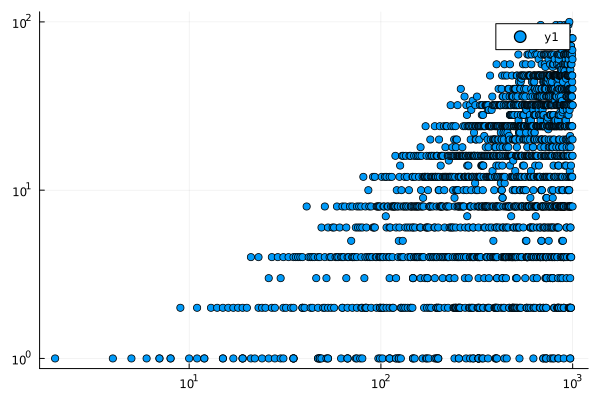

In [34]:
scatter(sicmul[1,:], sicmul[2,:], xaxis=:log, yaxis=:log)

In [16]:
dmax = 1000
sicnum = zeros(Int,dmax)
sicnum[1:3] .= 1
for d in 4:dmax
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        sicnum[d] += order(picard_group(OKf)[1])
        # println("f = ",f[j])
        # println(picard_group(OKf)[2])
    end
end
sicnum

1000-element Vector{Int64}:
   1
   1
   1
   1
   1
   1
   2
   2
   2
   1
   3
   2
   2
   ⋮
 120
  40
  84
  36
  80
  44
  84
  68
  32
  80
 144
  32

In [11]:
using Plots

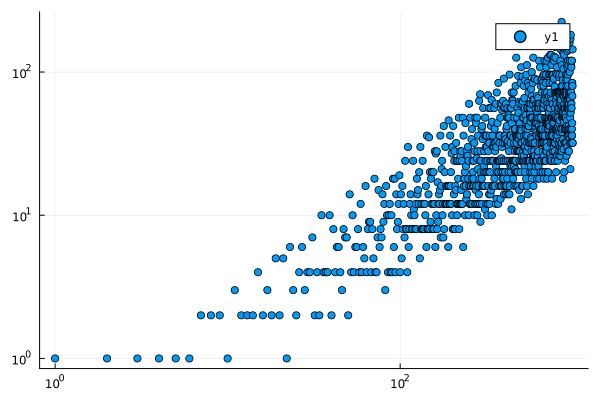

In [17]:
scatter(sicnum, xaxis=:log, yaxis=:log)

In [7]:
sicnum = [1,1,1]
for d in 4:45
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    println("\nd = $d, a = $a")
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        # println("f = ",f[j])
        println("f = $(f[j]), c(OKf) = ",order(picard_group(OKf)[1]))
        # println(picard_group(OKf)[2])
    end
end


d = 4, a = sqrt(5)
f = 1, c(OKf) = 1

d = 5, a = sqrt(12)
f = 1, c(OKf) = 1

d = 6, a = sqrt(21)
f = 1, c(OKf) = 1

d = 7, a = sqrt(8)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1

d = 8, a = sqrt(5)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 9, a = sqrt(60)
f = 1, c(OKf) = 2

d = 10, a = sqrt(77)
f = 1, c(OKf) = 1

d = 11, a = sqrt(24)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 2

d = 12, a = sqrt(13)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 13, a = sqrt(140)
f = 1, c(OKf) = 2

d = 14, a = sqrt(165)
f = 1, c(OKf) = 2

d = 15, a = sqrt(12)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 2

d = 16, a = sqrt(221)
f = 1, c(OKf) = 2

d = 17, a = sqrt(28)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 2

d = 18, a = sqrt(285)
f = 1, c(OKf) = 2

d = 19, a = sqrt(5)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 1
f = 8, c(OKf) = 2

d = 20, a = sqrt(357)
f = 1, c(OKf) = 2

d = 21, a = sqrt(44)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 4

d = 22, a = sqrt(437)
f = 1, c(OKf) = 1

d = 23, a = sqrt(120)
f = 1, c(OKf) = 2
f = 2